<a href="https://colab.research.google.com/github/Elman295/Coronavirus-tweets-NLP---Text-Classification/blob/main/Corona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#`About Dataset`

Perform Text Classification on the data. The tweets have been pulled from Twitter and manual tagging has been done then. <br/>
The names and usernames have been given codes to avoid any privacy concerns.

Columns: <br/>
1) Location <br/>
2) Tweet At <br/>
3) Original Tweet <br/>
4) Label

Source : https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification


However, in this project, I will use OriginalTweet as x (input) and Sentiment as y (output) respectively. In other words, we do not need all of the features from the submitted dataset.

In [2]:
import tensorflow as tf
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
with zipfile.ZipFile("Corona.zip","r") as f:
  f.extractall("data")

In [4]:
train_dir = os.path.join("data", "Corona_NLP_train.csv")
test_dir = os.path.join("data","Corona_NLP_test.csv")
os.listdir("data")

['Corona_NLP_train.csv', 'Corona_NLP_test.csv']

#`Exploring the data`

In [5]:
train_df = pd.read_csv(train_dir, encoding = 'latin-1')
test_df = pd.read_csv(test_dir, encoding = "latin-1")

In [6]:
train_df.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative


In [7]:
test_df.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
5,6,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a...,Neutral
6,7,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive
7,8,44960,"Geneva, Switzerland",03-03-2020,"@DrTedros ""We canÂt stop #COVID19 without pro...",Neutral
8,9,44961,NaN,04-03-2020,HI TWITTER! I am a pharmacist. I sell hand san...,Extremely Negative
9,10,44962,"Dublin, Ireland",04-03-2020,Anyone been in a supermarket over the last few...,Extremely Positive


In [8]:
train_df.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


In [9]:
train_df["Sentiment"].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [10]:
map_data = {
    "Positive":0,
    "Negative":1,
    "Neutral":2,
    "Extremely Positive":3,
    "Extremely Negative":4
}
y_train = train_df["Sentiment"].map(map_data)
y_test = test_df["Sentiment"].map(map_data)

In [12]:
print(y_train[:10])
print(y_train.shape)

0    2
1    0
2    0
3    0
4    4
5    0
6    0
7    2
8    0
9    1
Name: Sentiment, dtype: int64
(41157,)


In [13]:
x_train = train_df["OriginalTweet"]
x_test = test_df["OriginalTweet"]
print(x_train.shape)

(41157,)


In [14]:
max_tokens = 10000
vectorization_layer = tf.keras.layers.TextVectorization(
    max_tokens = max_tokens,
    output_sequence_length = 200
)

vectorization_layer.adapt(x_train)

In [15]:
def vectorize_text(x,y):
  x = tf.expand_dims(x,-1)
  return vectorization_layer(x), y

In [16]:
x_train_ready, y_train_ready = vectorize_text(x_train, y_train)
x_test_ready, y_test_ready = vectorize_text(x_test, y_test)

#`Defining the model`

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(max_tokens+1, 16),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 5, activation = "softmax")
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160016    
                                                                 
 dropout (Dropout)           (None, None, 16)          0         
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 5)                 85        
                                                                 
Total params: 160,101
Trainable params: 160,101
Non-trainable params: 0
__________________________________________________

In [19]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
optimizer = tf.keras.optimizers.Adam()

In [20]:
model.compile(
    loss = loss,
    optimizer = optimizer,
    metrics = ["accuracy"]
)

In [21]:
history = model.fit(
    x_train_ready,
    y_train_ready,
    epochs = 50
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1287/1287 [==============================] - 10s 7ms/step - loss: 1.5680 - accuracy: 0.2773
Epoch 2/50
1287/1287 [==============================] - 9s 7ms/step - loss: 1.5173 - accuracy: 0.3133
Epoch 3/50
1287/1287 [==============================] - 9s 7ms/step - loss: 1.4506 - accuracy: 0.3690
Epoch 4/50
1287/1287 [==============================] - 9s 7ms/step - loss: 1.3825 - accuracy: 0.4124
Epoch 5/50
1287/1287 [==============================] - 9s 7ms/step - loss: 1.3165 - accuracy: 0.4466
Epoch 6/50
1287/1287 [==============================] - 9s 7ms/step - loss: 1.2569 - accuracy: 0.4817
Epoch 7/50
1287/1287 [==============================] - 9s 7ms/step - loss: 1.2022 - accuracy: 0.5071
Epoch 8/50
1287/1287 [==============================] - 9s 7ms/step - loss: 1.1513 - accuracy: 0.5376
Epoch 9/50
1287/1287 [==============================] - 9s 7ms/step - loss: 1.1042 - accuracy: 0.5617
Epoch 10/50
1287/1287 [==============================] - 9s 7ms/step - loss: 1.0617 - accura

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

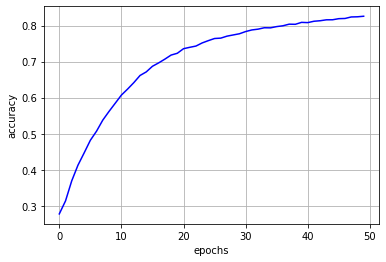

<Figure size 432x288 with 0 Axes>

In [23]:
plt.plot(history.history["accuracy"], color = "blue")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid()
plt.show()
plt.savefig("accuracy.png")

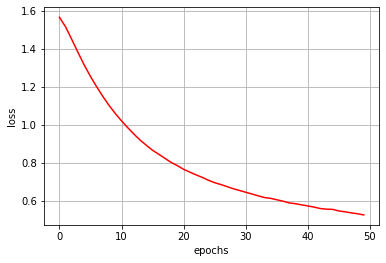

<Figure size 432x288 with 0 Axes>

In [24]:
plt.plot(history.history["loss"], color = "red")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()
plt.show()
plt.savefig("loss.png")

In [25]:
model.evaluate(x_test_ready, y_test_ready)

119/119 [==============================] - 0s 2ms/step - loss: 1.0121 - accuracy: 0.6580


[1.0120781660079956, 0.6579778790473938]

In [26]:
model.save("Corona.h5")